In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df = pd.read_csv('diabetic_readmission_data.csv', keep_default_na=False, na_values=[''])

In [153]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [154]:
df.shape

(101766, 50)

In [155]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [156]:
# show unique values count in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].nunique())

race 6
gender 3
age 10
weight 10
payer_code 18
medical_specialty 73
diag_1 717
diag_2 749
diag_3 790
max_glu_serum 4
A1Cresult 4
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
acetohexamide 2
glipizide 4
glyburide 4
tolbutamide 2
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
troglitazone 2
tolazamide 3
examide 1
citoglipton 1
insulin 4
glyburide-metformin 4
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 2
metformin-pioglitazone 2
change 2
diabetesMed 2
readmitted 3


In [157]:
# show unique values in categorical columns with less than 20 unique values
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() < 20:
        print(col, df[col].unique())

race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
max_glu_serum ['None' '>300' 'Norm' '>200']
A1Cresult ['None' '>7' '>8' 'Norm']
metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up'

In [158]:
# show unique values in categorical columns with more than 20 unique values
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() > 20:
        print(col, df[col].unique())

medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-

In [159]:
# Convert '?' to NaN
df.replace('?', np.nan, inplace=True)

# convert 'Unknown/Invalid' to NaN
df.replace('Unknown/Invalid', np.nan, inplace=True)


In [160]:
# show columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values['missing_percentage'] = (missing_values['missing_count'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='missing_percentage', ascending=False)
missing_values

,column_name,missing_count,missing_percentage
2,weight,98569,96.858479
4,medical_specialty,49949,49.082208
3,payer_code,40256,39.557416
0,race,2273,2.233555
7,diag_3,1423,1.398306
6,diag_2,358,0.351787
5,diag_1,21,0.020636
1,gender,3,0.002948


In [161]:
# drop 'weight' and 'payer_code' columns because of missing values and no significant information
clean_df = df.drop(columns=['weight', 'payer_code'])

# drop 'medical_specialty' because it has too many unique values and missing values
clean_df = clean_df.drop(columns=['medical_specialty'])
# drop 'examide', 'citoglipton' because they hjave only 1 unique value (no information)
clean_df = clean_df.drop(columns=['examide', 'citoglipton'])

clean_df.shape

(101766, 45)

In [162]:
# show columns with missing values
missing_values = clean_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values['missing_percentage'] = (missing_values['missing_count'] / clean_df.shape[0]) * 100
missing_values = missing_values.sort_values(by='missing_percentage', ascending=False)
missing_values

,column_name,missing_count,missing_percentage
0,race,2273,2.233555
4,diag_3,1423,1.398306
3,diag_2,358,0.351787
2,diag_1,21,0.020636
1,gender,3,0.002948


In [163]:
# drop rows with missing values
clean_df = clean_df.dropna()

clean_df.shape

(98052, 45)

In [164]:
# drop rows that have 'discharge_disposition_id' = 11 (death)
clean_df = clean_df[clean_df['discharge_disposition_id'] != 11]

In [165]:
# remove the information after the period (.) in diag_1, diag_2 and diag_3
def remove_after_period(value):
    if isinstance(value, str) and '.' in value:
        return value.split('.')[0]
    return value
clean_df.loc[:, 'diag_1'] = clean_df['diag_1'].apply(remove_after_period)
clean_df.loc[:, 'diag_2'] = clean_df['diag_2'].apply(remove_after_period)
clean_df.loc[:, 'diag_3'] = clean_df['diag_3'].apply(remove_after_period)

In [166]:
icd9_categories = {
    'Circulatory': [(390, 459), (785, 785)],
    'Respiratory': [(460, 519), (786, 786)],
    'Digestive': [(520, 579), (787, 787)],
    'Diabetes': [(250, 250)],
    'Injury': [(800, 999)],
    'Musculoskeletal': [(710, 739)],
    'Genitourinary': [(580, 629), (788, 788)],
    'Neoplasms': [(140, 239)]
}

def categorize_icd9(code, categories):
    if code.startswith('E') or code.startswith('V'):
        return 'Other'
    else:
        code = int(code)
        for category, ranges in categories.items():
            for start, end in ranges:
                if start <= code <= end:
                    return category
                
    return 'Other'

# Apply the categorization function to diag_1, diag_2, and diag_3
clean_df['diag_1'] = clean_df['diag_1'].apply(lambda x: categorize_icd9(x, icd9_categories))
clean_df['diag_2'] = clean_df['diag_2'].apply(lambda x: categorize_icd9(x, icd9_categories))
clean_df['diag_3'] = clean_df['diag_3'].apply(lambda x: categorize_icd9(x, icd9_categories))

In [ ]:
# create a 'numchange' column to count the number of changes in medication
# The columns that represent medication changes are:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 
        'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

clean_df['numchange'] = 0

for col in keys:
    clean_df['numchange'] += (~clean_df[col].isin(['No', 'Steady'])).astype(int)
    
clean_df['numchange'].value_counts()

numchange
0    70142
1    24922
2     1271
3      106
4        5
Name: count, dtype: int64

In [168]:
category_mappings = {
# Admission Type ID mapping
    'admission_type_id': {    
        2: 1, 7: 1,  # Emergency
        6: 5, 8: 5},   # Not Available
# Discharge Disposition ID mapping
    'discharge_disposition_id': {
        6: 1, 8: 1, 9: 1, 13: 1,  # Home
        3: 2, 4: 2, 5: 2, 14: 2, 22: 2, 23: 2, 24: 2,  # Transfer
        12: 10, 15: 10, 16: 10, 17: 10,  # Outpatient
        25: 18, 26: 18  # Unknown
    },
# Admission Source ID mapping
    'admission_source_id': {
        2: 1, 3: 1,  # Referral
        5: 4, 6: 4, 10: 4, 22: 4, 25: 4,  # Transfer
        15: 9, 17: 9, 20: 9, 21: 9,  # Not Available
        13: 11, 14: 11  # Law Enforcement
    }
}

binary_mappings = {
    'change': {'Ch': 1, 'No': 0},
    'gender': {'Male': 1, 'Female': 0},
    'diabetesMed': {'Yes': 1, 'No': 0}
}

med_mapping = {'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1}

lab_test_mappings = {
    'A1Cresult': {
        '>7': 1,     # Abnormal
        '>8': 1,     # Abnormal
        'Norm': 0,   # Normal
        'None': -99  # Test not performed
    },
    'max_glu_serum': {
        '>200': 1,   # Abnormal
        '>300': 1,   # Abnormal  
        'Norm': 0,   # Normal
        'None': -99  # Test not performed
    }
}

age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

readmission_mapping = {
    '>30': 0,  # Readmitted after 30 days
    '<30': 1,  # Readmitted within 30 days
    'NO': 0    # Not readmitted
}

med_status_mapping = {
    'No': 0,      # Not taking medication
    'Steady': 1,  # Taking medication, no adjustment
    'Up': 1,      # Taking medication with upward adjustment
    'Down': 1     # Taking medication with downward adjustment
}

In [169]:
# apply category mappings
for col, mapping in category_mappings.items():
    result = clean_df[col].replace(mapping)
    clean_df[col] = result.infer_objects(copy=False)

# apply binary mappings
for col, mapping in binary_mappings.items():
    result = clean_df[col].replace(mapping)
    clean_df[col] = result.infer_objects(copy=False)

# apply medication mappings
for col in keys:
    result = clean_df[col].replace(mapping)
    clean_df[col] = result.infer_objects(copy=False)

# apply lab test mappings
for col, mapping in lab_test_mappings.items():
    result = clean_df[col].replace(mapping)
    clean_df[col] = result.infer_objects(copy=False)

# apply age mapping
result = clean_df['age'].replace(age_mapping)
clean_df['age'] = result.infer_objects(copy=False)

# apply the readmission mapping
result = clean_df['readmitted'].replace(readmission_mapping)
clean_df['readmitted'] = result.infer_objects(copy=False)

# apply the medication status mapping
for col in keys:
    result = clean_df[col].replace(med_status_mapping)
    clean_df[col] = result.infer_objects(copy=False)

/tmp/ipykernel_157168/2865074492.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = clean_df[col].replace(mapping)
/tmp/ipykernel_157168/2865074492.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = clean_df[col].replace(mapping)
/tmp/ipykernel_157168/2865074492.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

In [170]:
clean_df['nummed'] = 0
for col in keys:
    clean_df['nummed'] += clean_df[col].astype(int)
clean_df['nummed'].value_counts()

nummed
1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: count, dtype: int64

In [ ]:
# drop multiple entries for the same patient
fe_df = clean_df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [172]:
fe_df['readmitted'].value_counts()

readmitted
0    61451
1     6129
Name: count, dtype: int64

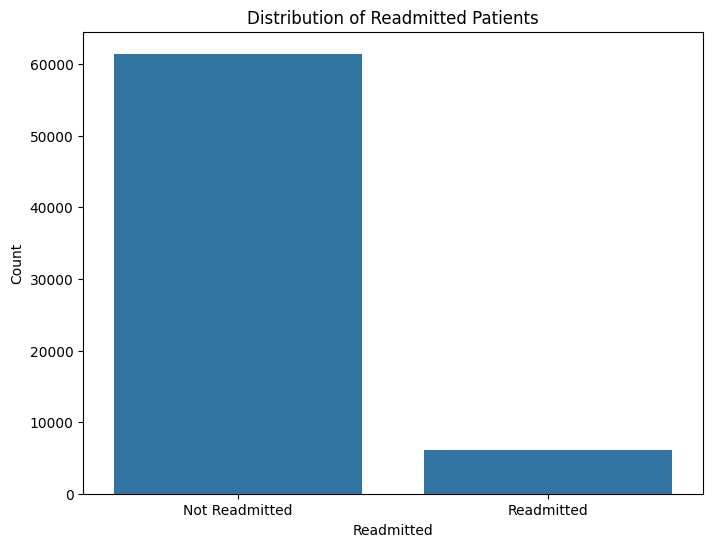

In [173]:
# distribution of readmitted patients
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=fe_df)
plt.title('Distribution of Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()

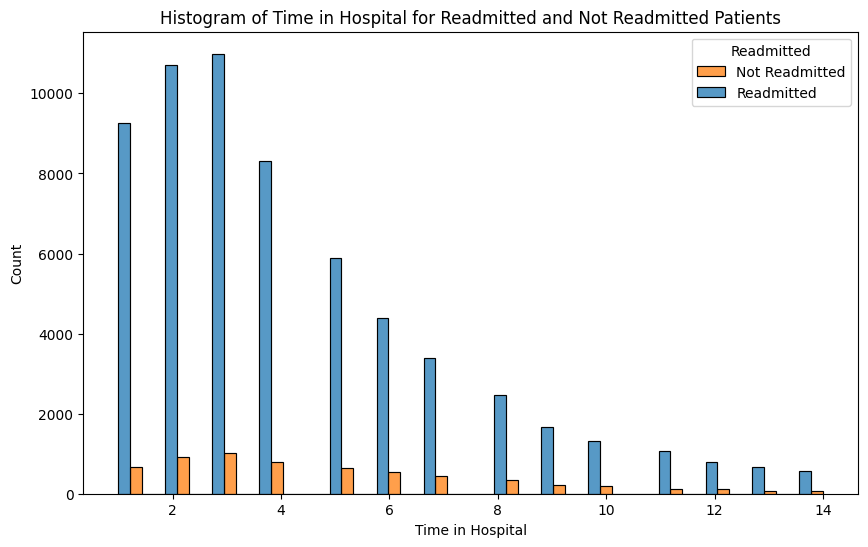

In [174]:
# distribution of time_in_hospital for readmitted and not readmitted patients without stacking
plt.figure(figsize=(10, 6))
sns.histplot(data=fe_df, x='time_in_hospital', hue='readmitted', multiple='dodge', bins=30)
plt.title('Histogram of Time in Hospital for Readmitted and Not Readmitted Patients')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()


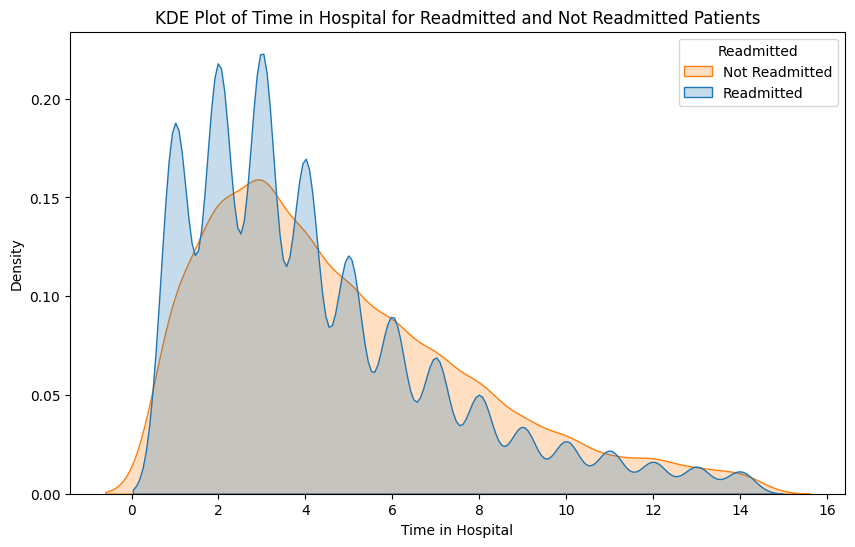

In [175]:
# kde time_in_hospital for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fe_df, x='time_in_hospital', hue='readmitted', common_norm=False, fill=True)
plt.title('KDE Plot of Time in Hospital for Readmitted and Not Readmitted Patients')
plt.xlabel('Time in Hospital')
plt.ylabel('Density')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

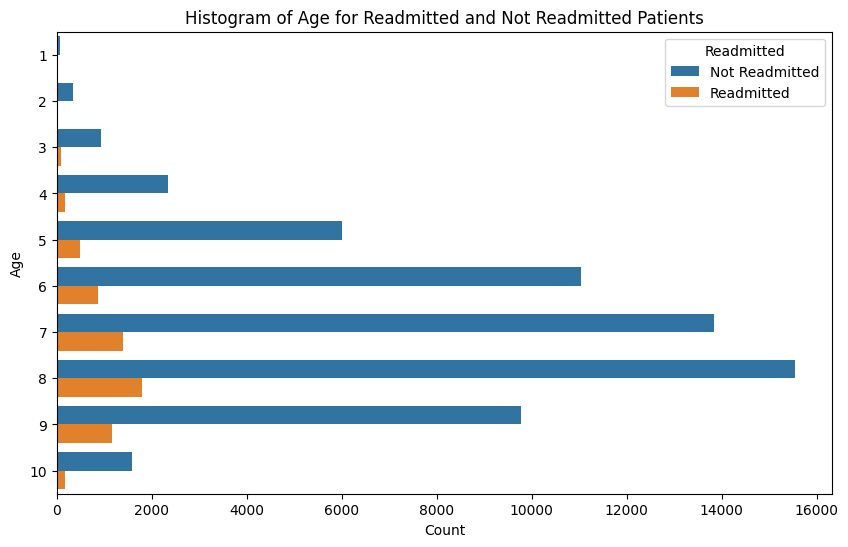

In [176]:
# distribution of age for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(data=fe_df, y='age', hue='readmitted')
plt.title('Histogram of Age for Readmitted and Not Readmitted Patients')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

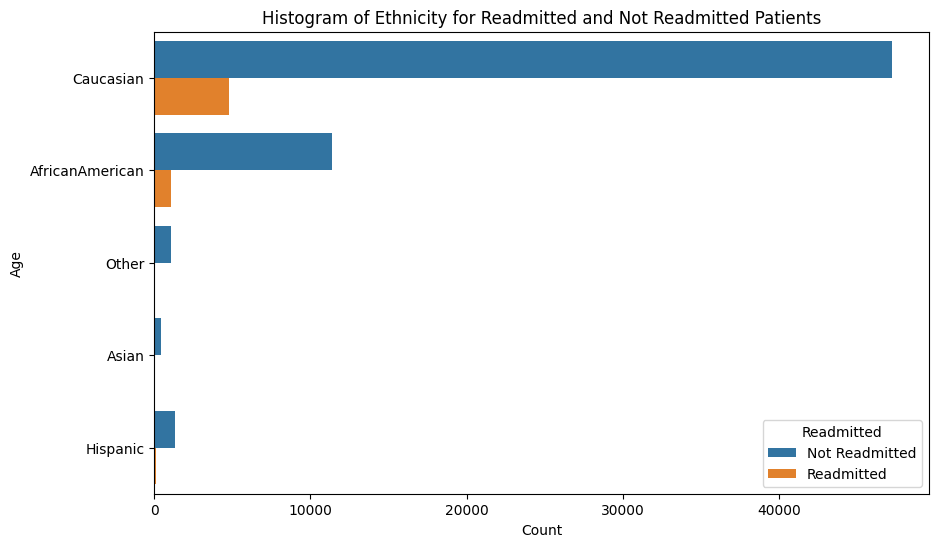

In [177]:
# distribution of race for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(data=fe_df, y='race', hue='readmitted')
plt.title('Histogram of Ethnicity for Readmitted and Not Readmitted Patients')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()


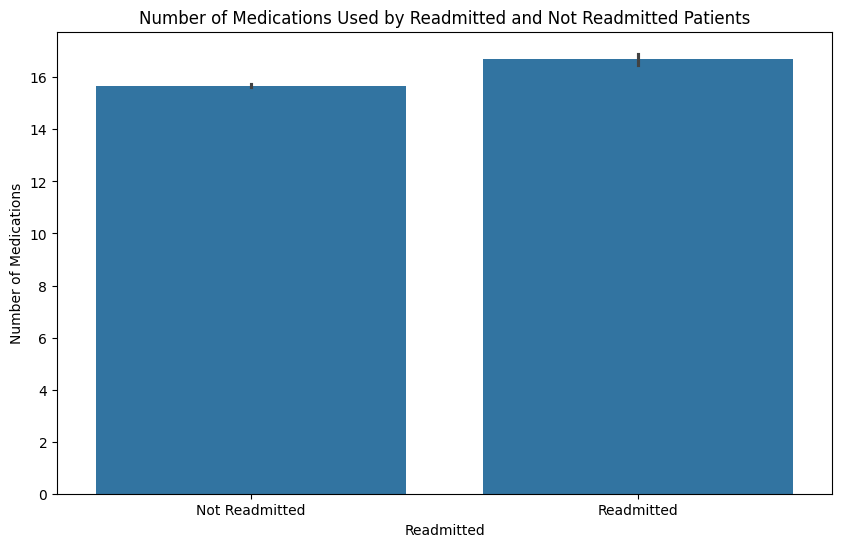

In [178]:
# number of medications used by readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.barplot(x=fe_df['readmitted'], y=fe_df['num_medications'])
plt.title('Number of Medications Used by Readmitted and Not Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Number of Medications')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()

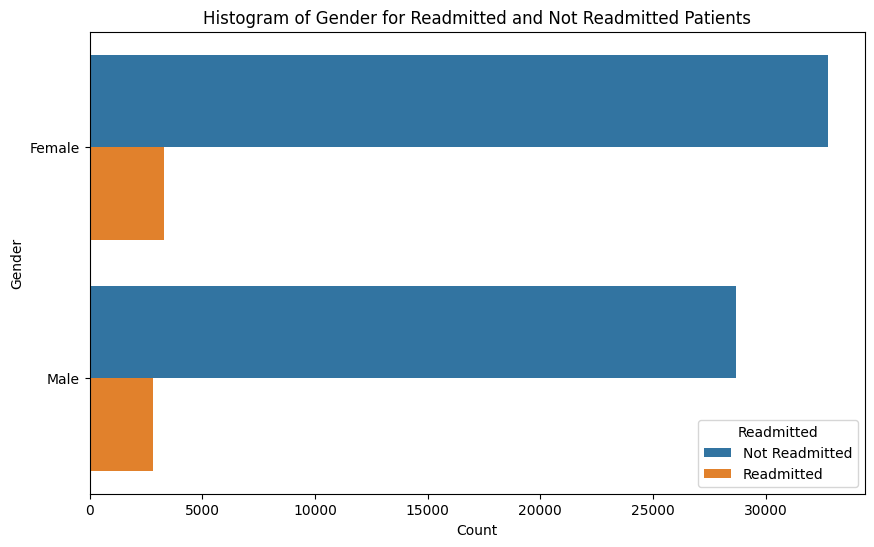

In [179]:
# distribution of gender for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(data=fe_df, y='gender', hue='readmitted')
plt.title('Histogram of Gender for Readmitted and Not Readmitted Patients')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.yticks([0, 1], ['Female', 'Male'])
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()


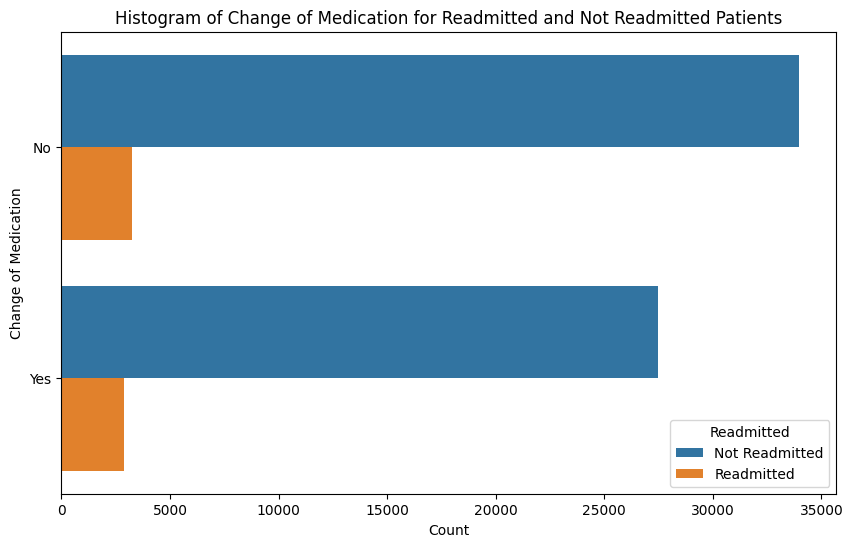

In [180]:
# distribution of change for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(data=fe_df, y='change', hue='readmitted')
plt.title('Histogram of Change of Medication for Readmitted and Not Readmitted Patients')
plt.xlabel('Count')
plt.ylabel('Change of Medication')
plt.yticks([0, 1], ['No', 'Yes'])
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])

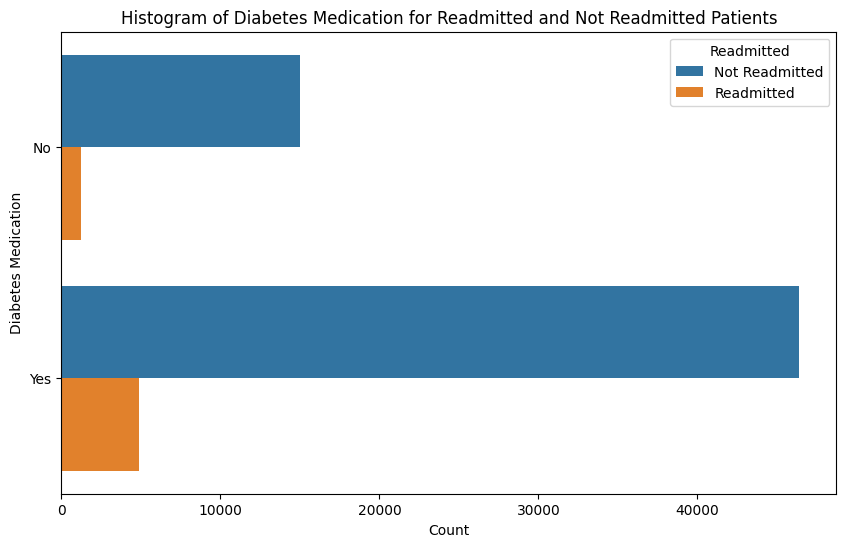

In [181]:
# distribution of diabetesMed for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(data=fe_df, y='diabetesMed', hue='readmitted')
plt.title('Histogram of Diabetes Medication for Readmitted and Not Readmitted Patients')
plt.xlabel('Count')
plt.ylabel('Diabetes Medication')
plt.yticks([0, 1], ['No', 'Yes'])
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

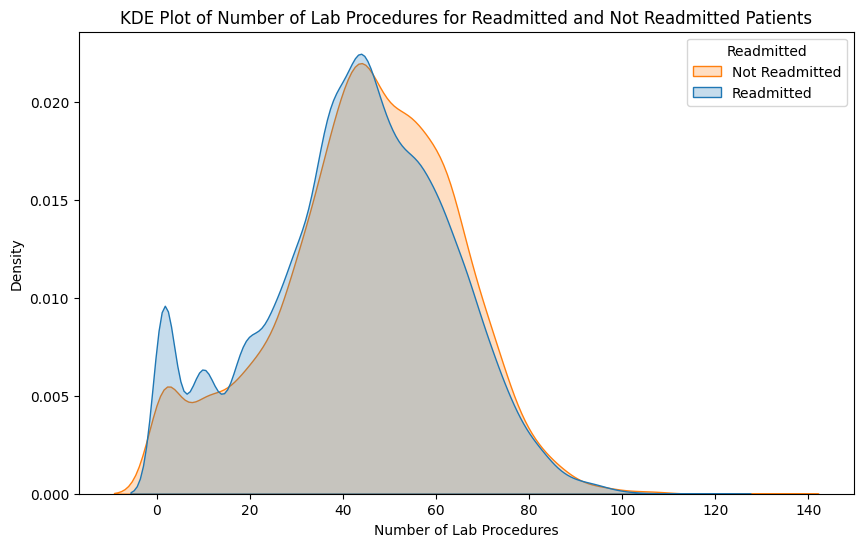

In [182]:
# kde of num_lab_procedures for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fe_df, x='num_lab_procedures', hue='readmitted', common_norm=False, fill=True)
plt.title('KDE Plot of Number of Lab Procedures for Readmitted and Not Readmitted Patients')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Density')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

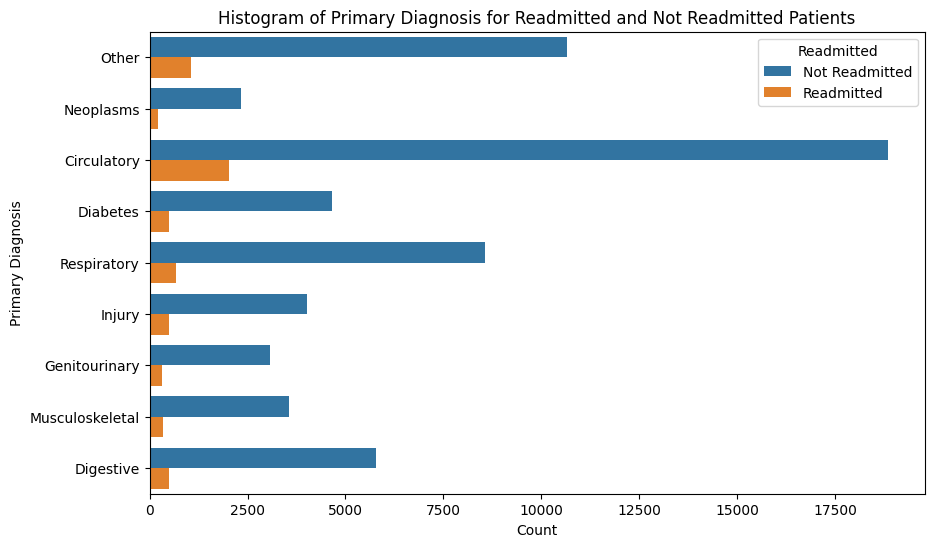

In [183]:
# distribution of diag_1 for readmitted and not readmitted patients
plt.figure(figsize=(10, 6))
sns.countplot(data=fe_df, y='diag_1', hue='readmitted')
plt.title('Histogram of Primary Diagnosis for Readmitted and Not Readmitted Patients')
plt.xlabel('Count')
plt.ylabel('Primary Diagnosis')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

In [184]:
# get numeric columns
numeric_cols = fe_df._get_numeric_data().columns.tolist()
numeric_cols.remove('readmitted')
numeric_cols


['encounter_id',
 'patient_nbr',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'numchange',
 'nummed']

In [185]:
obj_columns = ['gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'A1Cresult', 'max_glu_serum',
                'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone',  'metformin-pioglitazone',
                'change', 'diabetesMed',]

for col in obj_columns:
    fe_df.loc[:, col] = fe_df[col].astype(object)


/tmp/ipykernel_157168/1817687552.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 0 0 1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fe_df.loc[:, col] = fe_df[col].astype(object)
/tmp/ipykernel_157168/1817687552.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fe_df.loc[:, col] = fe_df[col].astype(object)
/tmp/ipykernel_157168/1817687552.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fe_df.loc[:, col] = fe_df[col].astype(object)
/tmp/ipykernel_157168/1817687552.py:8: FutureWarning: Setting an it

In [186]:
# get numeric columns
numeric_cols = fe_df._get_numeric_data().columns.tolist()
numeric_cols.remove('readmitted')
numeric_cols

['encounter_id',
 'patient_nbr',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'numchange',
 'nummed']

In [187]:
categorical_cols = fe_df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [188]:
# prepare data for modeling
X = fe_df
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X = X.drop(columns=['patient_nbr', 'encounter_id', 'readmitted'])

y = fe_df['readmitted']

In [189]:
# check for class imbalance
y.value_counts(normalize=True)

readmitted
0    0.909307
1    0.090693
Name: proportion, dtype: float64

In [190]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=20)
oversampled_X, oversampled_y = smt.fit_resample(X, y)
train_input_new = pd.DataFrame(oversampled_X, columns = list(X.columns))

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(oversampled_X, oversampled_y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98321, 81), (24581, 81), (98321,), (24581,))

In [192]:
# check for class imbalance
y_train.value_counts(normalize=True)


readmitted
1    0.501276
0    0.498724
Name: proportion, dtype: float64

In [193]:
# check for class imbalance
y_test.value_counts(normalize=True)

readmitted
0    0.505106
1    0.494894
Name: proportion, dtype: float64

In [194]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)

In [195]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [196]:
rf_prd = rf.predict(X_test)

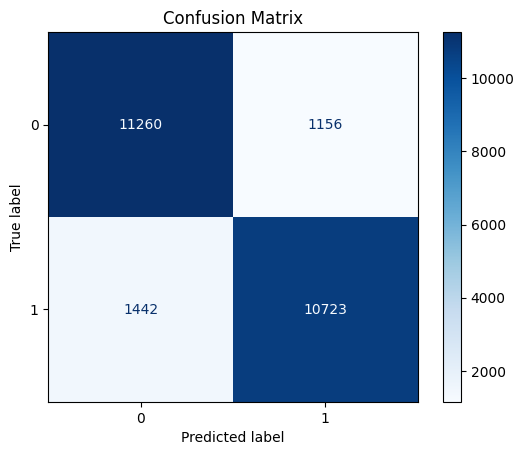

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_prd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

train_pred = rf.predict(X_train)
# train data metrics
print("Train data accuracy is {0:.2f}".format(accuracy_score(y_train, train_pred)))
print("Train data precision is {0:.2f}".format(precision_score(y_train, train_pred)))
print("Train data recall is {0:.2f}".format(recall_score(y_train, train_pred)))

# test data metrics
print("Test data accuracy is {0:.2f}".format(accuracy_score(y_test, rf_prd)))
print("Test data precision is {0:.2f}".format(precision_score(y_test, rf_prd)))
print("Test data recall is {0:.2f}".format(recall_score(y_test, rf_prd)))

Train data accuracy is 0.93
Train data precision is 0.93
Train data recall is 0.93
Test data accuracy is 0.89
Test data precision is 0.90
Test data recall is 0.88


ROC AUC score is 0.94


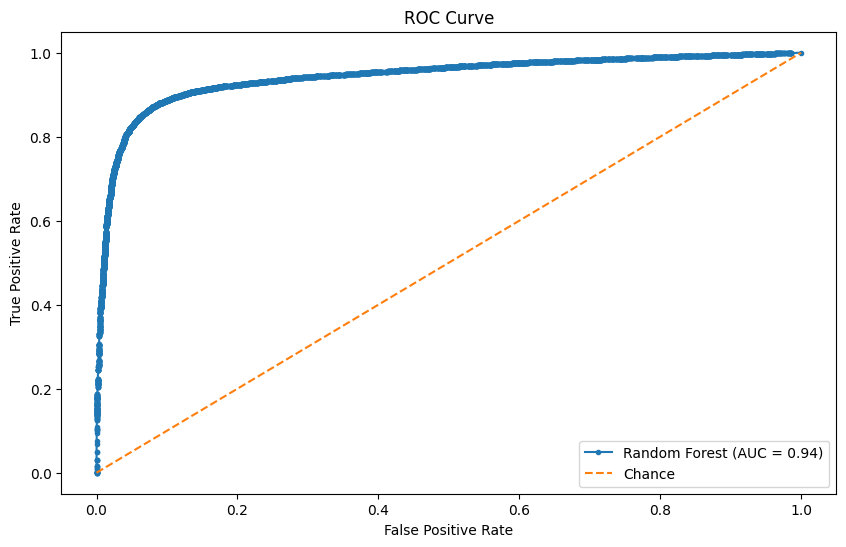

In [199]:
from sklearn.metrics import roc_auc_score, roc_curve
# ROC AUC score
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print("ROC AUC score is {0:.2f}".format(rf_auc))
# ROC curve
f_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize=(10, 6))
plt.plot(f_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

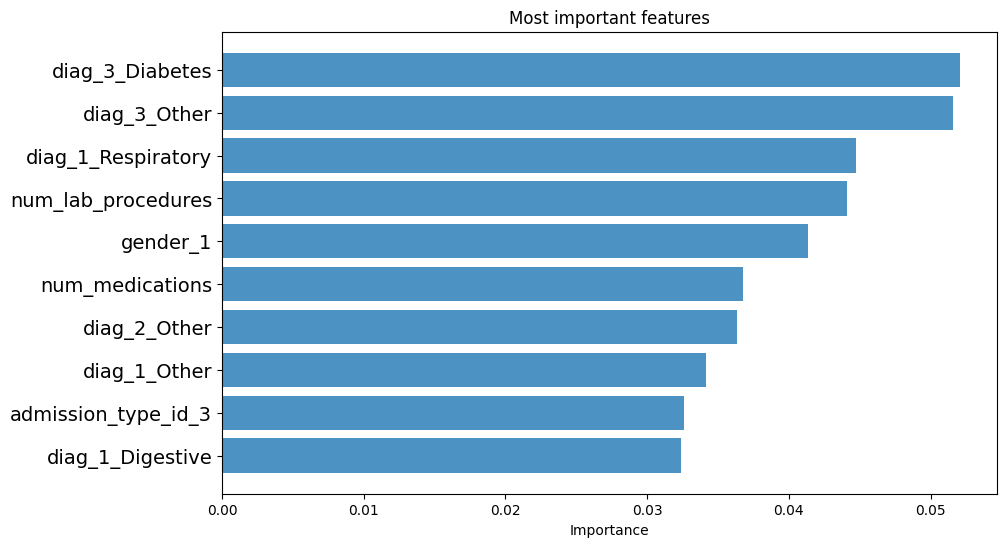

In [200]:
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features')
plt.show()

In [ ]:
# Sources used: 
# https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission
# https://en.wikipedia.org/wiki/List_of_ICD-9_codes
# https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008